---
title: Visualização de dados
order: 213
execute:
    enabled: true
---

Gráficos são ferramentas úteis para a análise exploratória de dados, mas é importante conhecer que tipos de dados mais se adequam a cada tipo de gráfico.

In [1]:
# | echo: false

# sobe o diretório se executado como notebook
import os
if os.environ.get("QUARTO_PROJECT_ROOT") is None:
    os.chdir(os.path.join(os.getcwd(), ".."))

## Gráfico de barras

Um dos gráficos mais simples, um gráfico de barras é útil para visualizar dados categóricos. Abaixo, vemos um gráfico do número de bares e cafeterias em três estados brasileiros [cadastrados no último trimestre de 2024](https://dados.gov.br/dados/conjuntos-dados/cadastur-15).

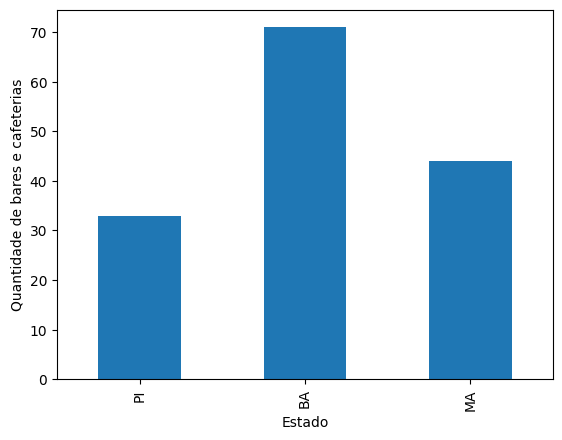

In [2]:
# | echo: false

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_excel("dados/restaurante-cafeteria-bar-e-similares.xlsx")

estados = (df["UF"] == "MA") | (df["UF"] == "PI") | (df["UF"] == "BA")

tipos = (df["Tipo"] == "Bar") | (df["Tipo"] == "Cafeteria")

ax = df[estados & tipos]["UF"].value_counts().loc[["PI", "BA", "MA"]].plot(kind="bar")

ax.set_xlabel("Estado")
ax.set_ylabel("Quantidade de bares e cafeterias")

plt.show()

Gráficos de barra nos permitem comunicar visualmente as respostas a algumas questões, por exemplo:

1. Que estado tem em torno de 45 estabelecimentos?
2. Que estado tem mais ou menos estabelecimentos?

No entanto, outras questões podem ser mais difíceis ou menos intuitivas de responder, por exemplo:

1. Que fração do total de estabelecimentos está no Piauí?
2. Qual é a quantidade total de estabelecimentos?

Dificuldades comuns são quando as alturas das barras estão muito próximas, ou quando barras muito grandes esticam a escala de valores a ponto de prejudicar a visualização das barras menores.
Por exemplo:

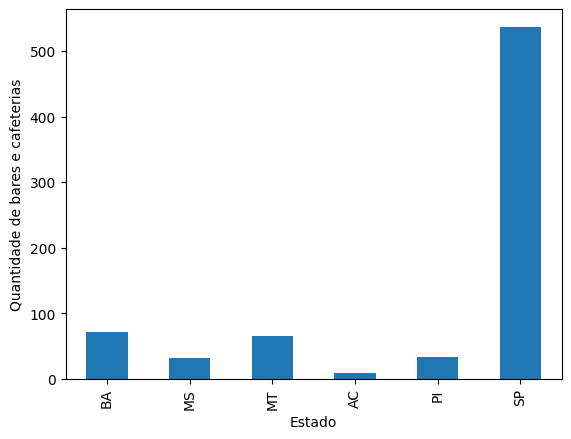

In [3]:
# | echo: false

estados = (df["UF"] == "MT") | (df["UF"] == "PI") | (df["UF"] == "BA") | (df["UF"] == "SP") | (df["UF"] == "AC") | (df["UF"] == "MS")

ax = df[estados & tipos]["UF"].value_counts().sample(frac=1, random_state=41).plot(kind="bar")

ax.set_xlabel("Estado")
ax.set_ylabel("Quantidade de bares e cafeterias")

plt.show()

## Gráfico de pizza

Uma forma mais indicada para visualizar proporções é por meio do gráfico de pizza, torta, ou de setores.
O mesmo exemplo anterior, com porcentagens acompanhando as fatias, é apresentado a seguir.

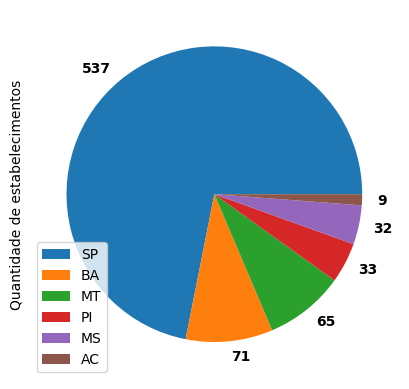

In [4]:
# | echo: false

def label_fmt(pct, vals):
    total = int(np.round(pct / 100. * np.sum(vals)))
    return f"{total:d}\n({pct:.1f}%)"

counts = df[estados & tipos]["UF"].value_counts()
count_labels = [f"{t}" for _, t in counts.items()]
ax = counts.plot.pie(ylabel="Quantidade de estabelecimentos", labels=count_labels, pctdistance=None, textprops={"weight": "bold"})

ax.legend(counts.index, loc="best")

plt.show()

## Histograma

Histogramas são visualmente similares a um gráfico de barras, mas a informação transmitida é diferente.
Enquanto um gráfico de barras típico desenha barras proporcionais à frequência de alguma variável categórica, o histograma desenha a frequência dos valores de uma variável numérica.

Por exemplo, vemos abaixo um histograma sobre duração média de horas de transmissão por mês dos [maiores streamers da Twitch em 2024](https://www.kaggle.com/datasets/aayushmishra1512/twitchdata/data) combinado com linhas de percentis.

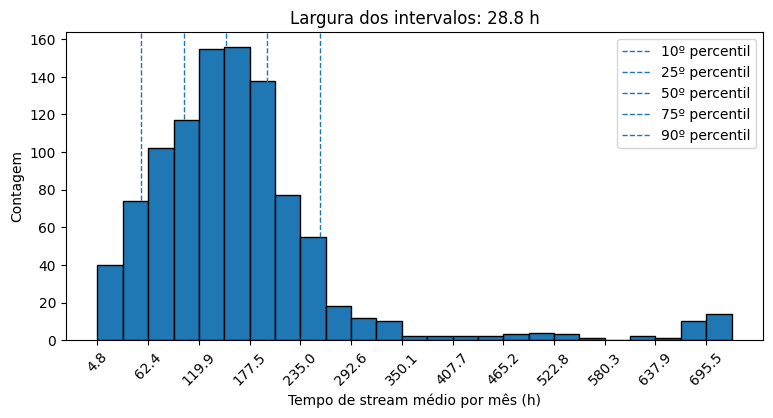

In [5]:
# | echo: false

df2 = pd.read_csv("dados/twitchdata-update.csv")

minutes = df2["Stream time(minutes)"] / 60 / 12

nbins = 25
_, bins_edges = np.histogram(minutes, bins=nbins)

minutes.hist(edgecolor="black", bins=nbins, xrot=45, grid=False, figsize=(9, 4))

pcts = [10, 25, 50, 75, 90]
pct_vals = np.percentile(minutes, pcts)

for i, p in enumerate(pcts):
    plt.axvline(pct_vals[i], linestyle="--", linewidth=1, label=f"{p}º percentil")

plt.xticks(bins_edges[::2])
plt.title(f"Largura dos intervalos: {bins_edges[2] - bins_edges[1]:.1f} h")
plt.xlabel("Tempo de stream médio por mês (h)")
plt.ylabel("Contagem")
plt.legend()

plt.show()

## Gráfico de caixas

Gráficos de caixas (ou *boxplots*) são úteis para visualizar distribuições.
A seguir, temos um exemplo mostrando a distribuição do [índice de felicidade](https://www.kaggle.com/datasets/unsdsn/world-happiness) de diversos países ao longo dos anos.

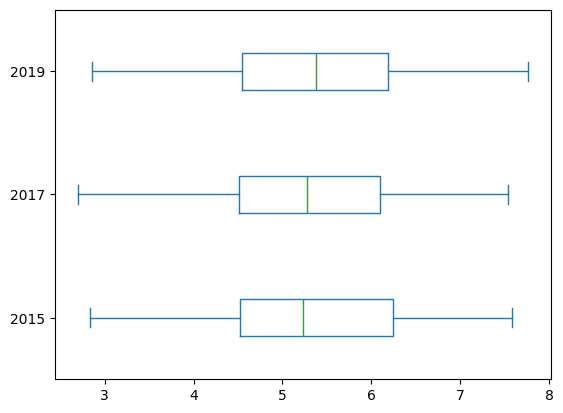

In [6]:
# | echo: false

df_hap_2015 = pd.read_csv("dados/2015.csv", index_col="Country")
df_hap_2017 = pd.read_csv("dados/2017.csv", index_col="Country")
df_hap_2019 = pd.read_csv("dados/2019.csv", index_col="Country or region")

df_hap = pd.DataFrame({"2015": df_hap_2015["Happiness Score"], "2017": df_hap_2017["Happiness.Score"], "2019": df_hap_2019["Score"] })

df_hap.plot.box(vert=False, showfliers=False)

plt.show()

## Gráfico de linha

Gráficos de linha também são chamados de gráficos de tendência e são particularmente úteis para visualizar a evolução de uma variável numérica ao longo do tempo.
A seguir temos um exemplo ilustrando o crescimento do [consumo doméstico de café](https://www.kaggle.com/datasets/michals22/coffee-dataset/data) de diversos países.

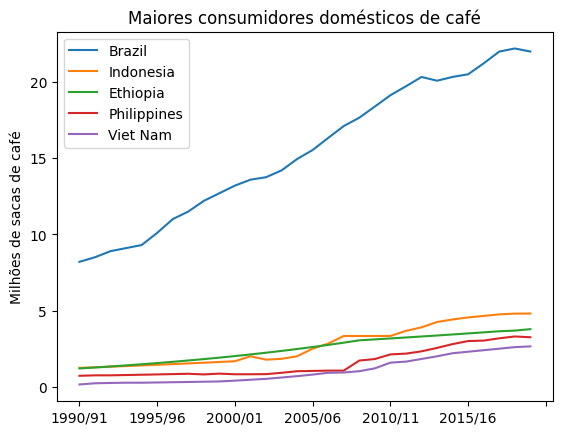

In [7]:
# | echo: false

df_cof = pd.read_csv("dados/Coffee_domestic_consumption.csv", index_col="Country")

fig, ax = plt.subplots()

cols = df_cof.columns[1:-1]

top_countries = df_cof.sort_values(by="2019/20", ascending=False).head(5).index

for idx in top_countries:
    srs = df_cof.loc[idx, cols] / 60 / 1_000_000
    srs.T.plot.line(label=idx, legend=True, ax=ax)


plt.title("Maiores consumidores domésticos de café")
plt.ylabel("Milhões de sacas de café")
plt.show()

## Gráfico de dispersão

Gráficos de dispersão permitem visualizar o relacionamento entre mais de uma variável.
Abaixo temos um exemplo da relação entre o PIB per capita e a pontuação de felicidade do relatório mundial.

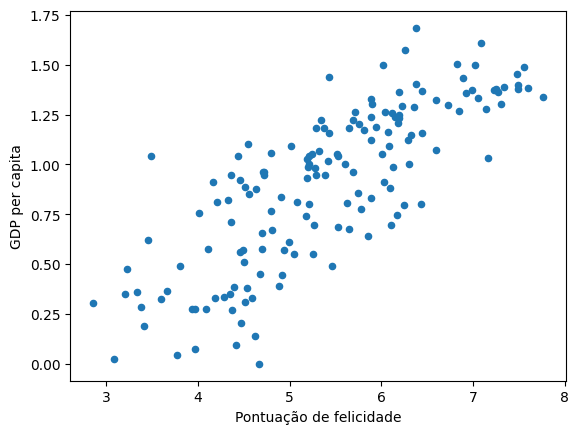

In [8]:
# | echo: false

ax = df_hap_2019.plot.scatter(x="Score", y="GDP per capita")

ax.set_xlabel("Pontuação de felicidade")

plt.show()